In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset_path = 'Dataset/IMDB-Movie-Data.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
# Data preprocessing
# Handle missing values
df.dropna(subset=['Rating'], inplace=True)


C:\Users\Aditi Prasad\AppData\Local\Temp\ipykernel_4080\3336746818.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(genres, rotation=90)


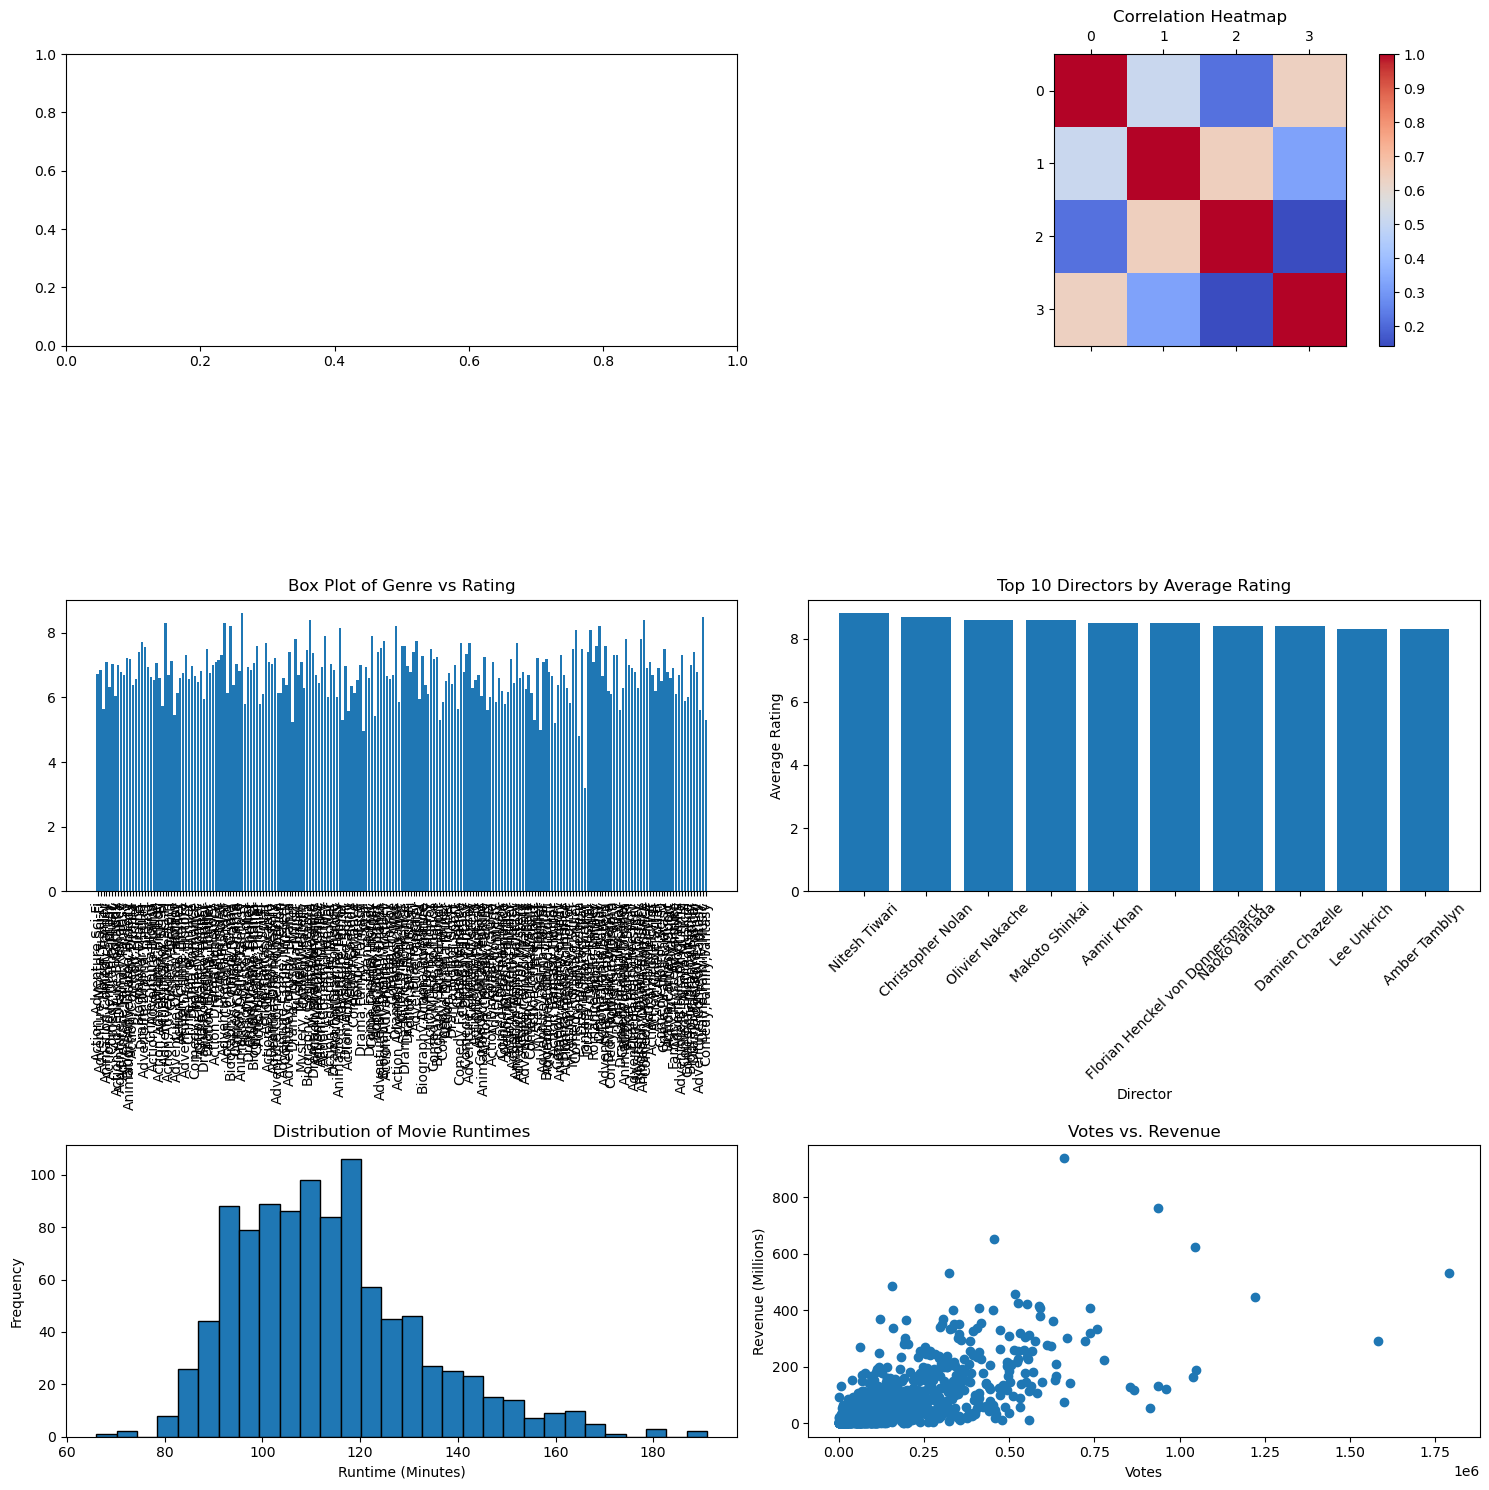

In [25]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Correlation Heatmap
correlation_matrix = df[['Rating', 'Votes', 'Revenue (Millions)', 'Metascore']].corr()
cax = axes[0, 1].matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax, ax=axes[0, 1], orientation='vertical')
axes[0, 1].set_title('Correlation Heatmap')

# Box Plot for Genre vs. Rating
genres = df['Genre'].unique()
genre_means = [df[df['Genre'] == genre]['Rating'].mean() for genre in genres]
axes[1, 0].bar(genres, genre_means)
axes[1, 0].set_xticklabels(genres, rotation=90)
axes[1, 0].set_title('Box Plot of Genre vs Rating')

# Bar Plot for Director vs. Average Rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
axes[1, 1].bar(top_directors.index, top_directors.values)
axes[1, 1].set_title('Top 10 Directors by Average Rating')
axes[1, 1].set_xlabel('Director')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

# Histogram for Runtime Distribution
axes[2, 0].hist(df['Runtime (Minutes)'], bins=30, edgecolor='black')
axes[2, 0].set_title('Distribution of Movie Runtimes')
axes[2, 0].set_xlabel('Runtime (Minutes)')
axes[2, 0].set_ylabel('Frequency')

# Scatter Plot for Votes vs. Revenue
axes[2, 1].scatter(df['Votes'], df['Revenue (Millions)'])
axes[2, 1].set_title('Votes vs. Revenue')
axes[2, 1].set_xlabel('Votes')
axes[2, 1].set_ylabel('Revenue (Millions)')

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
# Split the data into training and testing sets
X = df[['Genre', 'Director', 'Actors', 'Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Feature encoding (convert categorical variables to numerical)
numeric_features = ['Votes']
categorical_features = ['Genre', 'Director', 'Actors']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [8]:
# Combine preprocessor with the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


In [9]:

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actors'])])),
                ('regressor', LinearRegression())])

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9227984596359542


In [12]:
# Sample prediction
sample_data = {'Genre': ['Action'], 'Director': ['Christopher Nolan'], 'Actors': ['Leonardo DiCaprio'], 'Votes': [150000]}
sample_df = pd.DataFrame(sample_data)
sample_prediction = model.predict(sample_df)

print(f'Sample Prediction: {sample_prediction[0]}')

Sample Prediction: 3.984635920702816
